# Bibliotecas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [7]:
dados_pede = pd.read_excel('tb_pesquisa_desenvolvimento_educacional_passos.xlsx')
dados_pede.head()

,ANO,ANOS_PM,ANO_INGRESSO,BOLSISTA,CF,CG,CT,DEFASAGEM,DESTAQUE_IDA,DESTAQUE_IEG,...,NOTA_PORT,PEDRA,PONTO_VIRADA,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,SINALIZADOR_INGRESSANTE,TURMA
0,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,Ametista,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,Ametista,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,Quartzo,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,NaN,NaN,NaN,NaN,NaN,NaN,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,Ametista,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dados_externos = pd.read_excel('tb_populacao_economia_idade_distancia.xlsx')
dados_externos.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,Área da unidade territorial,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,Distância
0,Adamantina,2.2,0.790,38997.12,411.987,34687,84.19,7609,499.141743
1,Adolfo,1.8,0.730,32578.28,211.055,4351,20.62,1064,369.221881
2,Aguaí,2.3,0.715,35551.70,474.554,32072,67.58,8725,136.239243
3,Águas da Prata,2.2,0.781,25297.02,142.673,7369,51.65,1580,145.356177
4,Águas de Lindóia,1.9,0.745,30971.23,60.126,17930,298.21,4089,105.653242


In [9]:
dados_externos.isnull().sum()

Município                                            0
Salário médio mensal dos trabalhadores formais       0
Índice de Desenvolvimento Humano Municipal (IDHM)    0
PIB per capita                                       0
Área da unidade territorial                          0
População no último censo                            0
Densidade demográfica habitante/km²                  0
Pessoas em idade elegível                            0
Distância                                            0
dtype: int64

In [10]:
dados_externos.shape

(645, 9)

In [11]:
dados_externos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Município                                          645 non-null    object 
 1   Salário médio mensal dos trabalhadores formais     645 non-null    float64
 2   Índice de Desenvolvimento Humano Municipal (IDHM)  645 non-null    float64
 3   PIB per capita                                     645 non-null    float64
 4   Área da unidade territorial                        645 non-null    float64
 5   População no último censo                          645 non-null    int64  
 6   Densidade demográfica habitante/km²                645 non-null    float64
 7   Pessoas em idade elegível                          645 non-null    int64  
 8   Distância                                          645 non-null    float64
dtypes: float64(

In [12]:
idade_aluno = dados_pede[['NOME', 'IDADE_ALUNO']]
#.groupby('IDADE_ALUNO').count()
idade_aluno.head()

,NOME,IDADE_ALUNO
0,ALUNO-1,11
1,ALUNO-2,NaN
2,ALUNO-3,12
3,ALUNO-4,10
4,ALUNO-5,10


In [13]:
idade_aluno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NOME         4047 non-null   object
 1   IDADE_ALUNO  728 non-null    object
dtypes: object(2)
memory usage: 63.4+ KB


In [14]:
idade_aluno['IDADE_ALUNO'] = idade_aluno['IDADE_ALUNO'].str.replace('D108', '0')

C:\Users\tmdpaula\AppData\Local\Temp\ipykernel_35892\3067707812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idade_aluno['IDADE_ALUNO'] = idade_aluno['IDADE_ALUNO'].str.replace('D108', '0')


In [15]:
idade_aluno['IDADE_ALUNO'] = idade_aluno['IDADE_ALUNO'].fillna(0).astype(int)

C:\Users\tmdpaula\AppData\Local\Temp\ipykernel_35892\3174307791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idade_aluno['IDADE_ALUNO'] = idade_aluno['IDADE_ALUNO'].fillna(0).astype(int)


In [16]:
idade_aluno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NOME         4047 non-null   object
 1   IDADE_ALUNO  4047 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 47.6+ KB


In [17]:
#idade_aluno['IDADE_ALUNO'].min()

idade_aluno[idade_aluno['IDADE_ALUNO'] > 0].min()

NOME           ALUNO-1
IDADE_ALUNO          7
dtype: object

In [18]:
idade_aluno['IDADE_ALUNO'].max()

20

In [19]:
idade_aluno.loc[idade_aluno['IDADE_ALUNO'] == 7]

,NOME,IDADE_ALUNO
29,ALUNO-30,7
75,ALUNO-76,7
456,ALUNO-457,7
505,ALUNO-506,7
759,ALUNO-760,7
802,ALUNO-803,7
885,ALUNO-886,7
1094,ALUNO-1095,7
1281,ALUNO-1282,7


In [20]:
dados_externos.describe()

,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,Área da unidade territorial,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,Distância
count,645.000000,645.000000,645.000000,645.000000,6.450000e+02,645.000000,6.450000e+02,645.000000
mean,2.314419,0.739527,42570.214109,384.836405,6.885463e+04,329.735287,1.794744e+04,277.389401
std,0.478572,0.032477,39799.761795,319.930434,4.644210e+05,1284.631338,1.186579e+05,158.321212
min,1.300000,0.639000,9468.330000,3.612000,9.070000e+02,3.510000,2.170000e+02,0.000000
25%,2.000000,0.719000,23966.140000,158.025000,5.466000e+03,20.210000,1.429000e+03,145.356177
50%,2.200000,0.738000,32233.410000,281.033000,1.316300e+04,40.070000,3.365000e+03,268.556071
75%,2.500000,0.761000,46763.190000,511.621000,3.832400e+04,117.500000,1.009000e+04,409.601689
max,5.500000,0.862000,457517.700000,1978.795000,1.145200e+07,13416.810000,2.919301e+06,700.561245


In [21]:
dados_externos_considerados = dados_externos[['Município', 'Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'Área da unidade territorial', 'População no último censo', 'Densidade demográfica habitante/km²']]
dados_externos_considerados.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,Área da unidade territorial,População no último censo,Densidade demográfica habitante/km²
0,Adamantina,2.2,0.790,38997.12,411.987,34687,84.19
1,Adolfo,1.8,0.730,32578.28,211.055,4351,20.62
2,Aguaí,2.3,0.715,35551.70,474.554,32072,67.58
3,Águas da Prata,2.2,0.781,25297.02,142.673,7369,51.65
4,Águas de Lindóia,1.9,0.745,30971.23,60.126,17930,298.21


<Axes: >

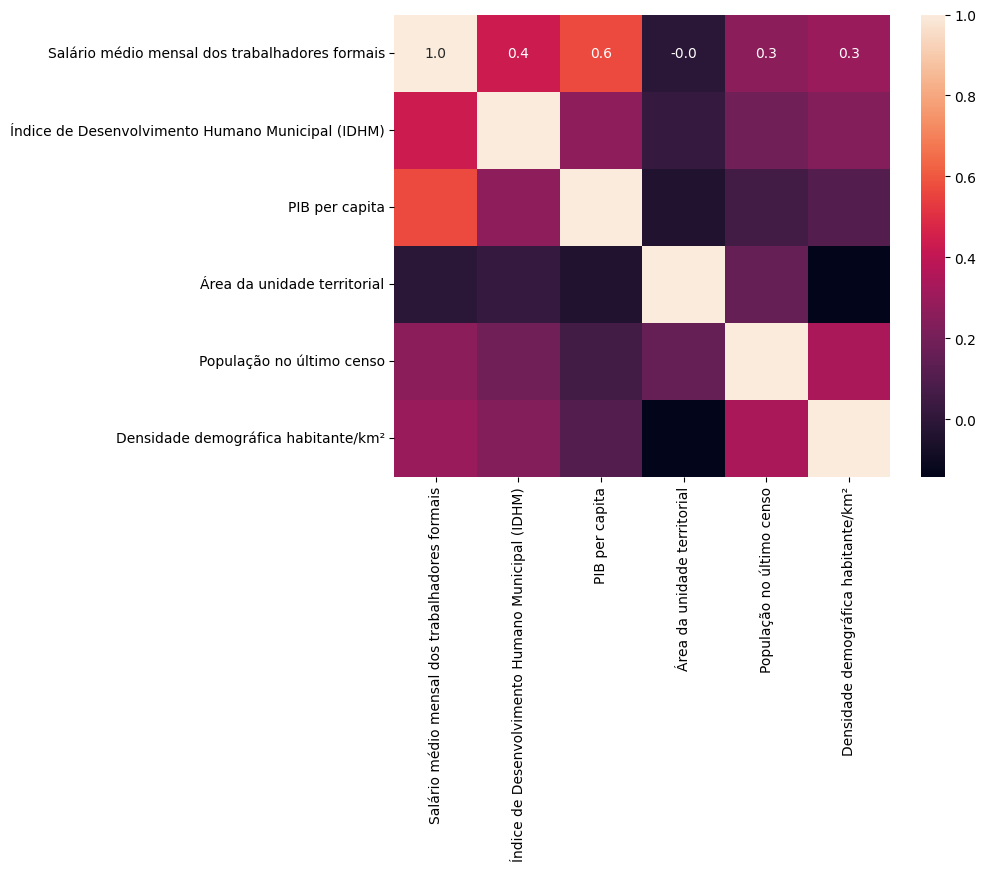

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(dados_externos_considerados[['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'Área da unidade territorial', 'População no último censo', 'Densidade demográfica habitante/km²']].corr(method = 'pearson'), annot=True, fmt=".1f")

In [23]:
dados_ordenados_por_area = dados_externos_considerados.sort_values('Área da unidade territorial', ascending=False)
dados_ordenados_por_area.head(20)

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,Área da unidade territorial,População no último censo,Densidade demográfica habitante/km²
233,Iguape,2.2,0.726,51053.14,1978.795,29115,14.71
258,Itapeva,2.1,0.732,39783.21,1826.258,89728,49.13
257,Itapetininga,2.1,0.763,38058.01,1789.350,157790,88.18
164,Eldorado,2.0,0.691,21122.95,1654.256,13069,7.90
117,Capão Bonito,1.9,0.721,26945.89,1640.229,46337,28.25
475,Rancharia,1.9,0.751,46459.21,1587.498,28588,18.01
62,Barretos,2.4,0.789,47783.95,1566.161,122485,78.21
608,Teodoro Sampaio,2.0,0.741,26801.81,1555.803,22173,14.25
564,São Paulo,4.3,0.805,66872.84,1521.202,11451999,7528.26
85,Botucatu,2.8,0.800,39937.48,1482.642,145155,97.90


# Modelo matemático

In [24]:
dados_externos_modelo = dados_externos[['Município', 'Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']]
dados_externos_modelo.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível
0,Adamantina,2.2,0.790,38997.12,34687,84.19,7609
1,Adolfo,1.8,0.730,32578.28,4351,20.62,1064
2,Aguaí,2.3,0.715,35551.70,32072,67.58,8725
3,Águas da Prata,2.2,0.781,25297.02,7369,51.65,1580
4,Águas de Lindóia,1.9,0.745,30971.23,17930,298.21,4089


In [25]:
# Normalizandos os dados
variaveis_para_normalizar = ['População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']

variaveis_para_normalizar_inversamente = ['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita']

# Normalização
scaler = MinMaxScaler()
dados_externos_modelo[variaveis_para_normalizar] = scaler.fit_transform(dados_externos_modelo[variaveis_para_normalizar])

# Normalização inversa
scaler = MinMaxScaler()
dados_externos_modelo[variaveis_para_normalizar_inversamente] = 1 - scaler.fit_transform(dados_externos_modelo[variaveis_para_normalizar_inversamente])

dados_externos_modelo.head()



C:\Users\tmdpaula\AppData\Local\Temp\ipykernel_35892\4175180448.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_externos_modelo[variaveis_para_normalizar] = scaler.fit_transform(dados_externos_modelo[variaveis_para_normalizar])
C:\Users\tmdpaula\AppData\Local\Temp\ipykernel_35892\4175180448.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_externos_modelo[variaveis_para_normalizar_inversamente] = 1 - scaler.fit_transform(dados_externos_modelo[variaveis_para_normalizar_inversamente])


,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível
0,Adamantina,0.785714,0.322870,0.934095,0.002950,0.006015,0.002532
1,Adolfo,0.880952,0.591928,0.948421,0.000301,0.001276,0.000290
2,Aguaí,0.761905,0.659193,0.941785,0.002722,0.004777,0.002915
3,Águas da Prata,0.785714,0.363229,0.964672,0.000564,0.003589,0.000467
4,Águas de Lindóia,0.857143,0.524664,0.952008,0.001487,0.021971,0.001326


In [26]:
# Pesos
prioridade_salario_medio = 6
prioridade_pib_per_capita = 5
prioridade_idh = 4
prioridade_densidade_demografica = 3
prioridade_populacao = 2
prioridade_pessoas_idade_elegivel = 1

# Atribuição de pesos
dados_externos_modelo['Salário médio mensal dos trabalhadores formais'] = prioridade_salario_medio * dados_externos_modelo['Salário médio mensal dos trabalhadores formais']
dados_externos_modelo['PIB per capita'] = prioridade_pib_per_capita * dados_externos_modelo['PIB per capita']
dados_externos_modelo['Densidade demográfica habitante/km²'] = prioridade_densidade_demografica * dados_externos_modelo['Densidade demográfica habitante/km²']
dados_externos_modelo['População no último censo'] = prioridade_populacao * dados_externos_modelo['População no último censo']
dados_externos_modelo['Índice de Desenvolvimento Humano Municipal (IDHM)'] = prioridade_idh * dados_externos_modelo['Índice de Desenvolvimento Humano Municipal (IDHM)']
dados_externos_modelo['Pessoas em idade elegível'] = prioridade_pessoas_idade_elegivel * dados_externos_modelo['Pessoas em idade elegível']

# Soma ponderada
dados_externos_modelo['soma_ponderada'] = dados_externos_modelo[['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']].sum(axis=1)

# Classificar o DataFrame com base na soma ponderada
dados_classificados = dados_externos_modelo.sort_values(by='soma_ponderada', ascending=False)


C:\Users\tmdpaula\AppData\Local\Temp\ipykernel_35892\4255526362.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_externos_modelo['Salário médio mensal dos trabalhadores formais'] = prioridade_salario_medio * dados_externos_modelo['Salário médio mensal dos trabalhadores formais']
C:\Users\tmdpaula\AppData\Local\Temp\ipykernel_35892\4255526362.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_externos_modelo['PIB per capita'] = prioridade_pib_per_capita * dados_externos_modelo['PIB per capi

In [27]:
# Visualizando o DataFrame classificado
dados_classificados.head(10)

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,soma_ponderada
121,Carapicuíba,4.714286,2.026906,4.916960,0.067431,2.504636,0.038618,14.268836
61,Barra do Turvo,5.285714,3.964126,4.921058,0.001043,0.000740,0.000599,14.173279
483,Ribeirão Branco,5.428571,4.000000,4.689905,0.003095,0.005189,0.001877,14.128637
261,Itapirapuã Paulista,5.428571,3.605381,4.968987,0.000594,0.001584,0.000395,14.005512
60,Barra do Chapéu,5.428571,3.623318,4.848077,0.000746,0.002071,0.000445,13.903229
416,Pedra Bela,5.571429,3.318386,4.890602,0.000987,0.008463,0.000437,13.790304
80,Bom Sucesso de Itararé,5.142857,3.623318,4.928087,0.000462,0.005167,0.000315,13.700207
607,Tejupá,5.428571,3.479821,4.759456,0.000562,0.002331,0.000339,13.671080
364,Natividade da Serra,5.000000,3.713004,4.948325,0.001064,0.001094,0.000504,13.663991
91,Buri,5.428571,3.497758,4.724887,0.003378,0.002999,0.002120,13.659713


In [28]:
dados_classificados.describe()

,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,soma_ponderada
count,645.000000,645.000000,6.450000e+02,645.000000,645.000000,645.000000,645.000000
mean,4.550831,2.196823,4.630600e+00,0.011867,0.072963,0.006074,11.469158
std,0.683674,0.582553,4.441448e-01,0.081114,0.287319,0.040649,1.286581
min,0.000000,0.000000,-1.110223e-15,0.000000,0.000000,0.000000,2.837068
25%,4.285714,1.811659,4.583809e+00,0.000796,0.003735,0.000415,10.849576
50%,4.714286,2.224215,4.745953e+00,0.002141,0.008177,0.001078,11.661239
75%,5.000000,2.565022,4.838212e+00,0.006535,0.025495,0.003382,12.291300
max,6.000000,4.000000,5.000000e+00,2.000000,3.000000,1.000000,14.268836


In [29]:
dados_externos.iloc[121]

Município                                            Carapicuíba
Salário médio mensal dos trabalhadores formais               2.2
Índice de Desenvolvimento Humano Municipal (IDHM)          0.749
PIB per capita                                          16909.54
Área da unidade territorial                               34.546
População no último censo                                 386984
Densidade demográfica habitante/km²                     11201.99
Pessoas em idade elegível                                 112945
Distância                                               23.56001
Name: 121, dtype: object

In [30]:
dados_classificados = dados_externos_modelo.sort_values(by='soma_ponderada', ascending=True)
dados_classificados.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,soma_ponderada
412,Paulínia,1.428571,1.201794,-1.110223e-15,0.019148,0.177361,0.010194,2.837068
194,Gavião Peixoto,0.000000,2.565022,2.375876e+00,0.000663,0.003529,0.000372,4.945463
310,Louveira,2.714286,1.524664,8.006280e-01,0.008897,0.207260,0.005045,5.260779
282,Jaguariúna,2.571429,1.399103,2.501831e+00,0.010207,0.093093,0.005237,6.580900
236,Ilhabela,3.857143,1.901345,8.024992e-01,0.005943,0.021771,0.003274,6.591975


In [31]:
dados_externos.iloc[412]

Município                                             Paulínia
Salário médio mensal dos trabalhadores formais             4.5
Índice de Desenvolvimento Humano Municipal (IDHM)        0.795
PIB per capita                                        457517.7
Área da unidade territorial                            138.777
População no último censo                               110537
Densidade demográfica habitante/km²                     796.51
Pessoas em idade elegível                                29975
Distância                                            89.913478
Name: 412, dtype: object

# K-Means

In [32]:
import pandas as pd
import numpy as np

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Para processar arquivos e imagens
from PIL import Image
import glob

# Para plotar imagens
import matplotlib.image as mpimg

#Feature Engineer
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [33]:
dados_externos.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,Área da unidade territorial,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,Distância
0,Adamantina,2.2,0.790,38997.12,411.987,34687,84.19,7609,499.141743
1,Adolfo,1.8,0.730,32578.28,211.055,4351,20.62,1064,369.221881
2,Aguaí,2.3,0.715,35551.70,474.554,32072,67.58,8725,136.239243
3,Águas da Prata,2.2,0.781,25297.02,142.673,7369,51.65,1580,145.356177
4,Águas de Lindóia,1.9,0.745,30971.23,60.126,17930,298.21,4089,105.653242


In [34]:
dados_model_kmeans = dados_externos[['Município', 'Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']]
dados_model_kmeans.head()

,Município,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível
0,Adamantina,2.2,0.790,38997.12,34687,84.19,7609
1,Adolfo,1.8,0.730,32578.28,4351,20.62,1064
2,Aguaí,2.3,0.715,35551.70,32072,67.58,8725
3,Águas da Prata,2.2,0.781,25297.02,7369,51.65,1580
4,Águas de Lindóia,1.9,0.745,30971.23,17930,298.21,4089


In [35]:
dados_model_kmeans.shape

(645, 7)

array([[<Axes: title={'center': 'Salário médio mensal dos trabalhadores formais'}>,
        <Axes: title={'center': 'Índice de Desenvolvimento Humano Municipal (IDHM)'}>],
       [<Axes: title={'center': 'PIB per capita'}>,
        <Axes: title={'center': 'População no último censo'}>],
       [<Axes: title={'center': 'Densidade demográfica habitante/km²'}>,
        <Axes: title={'center': 'Pessoas em idade elegível'}>]],
      dtype=object)

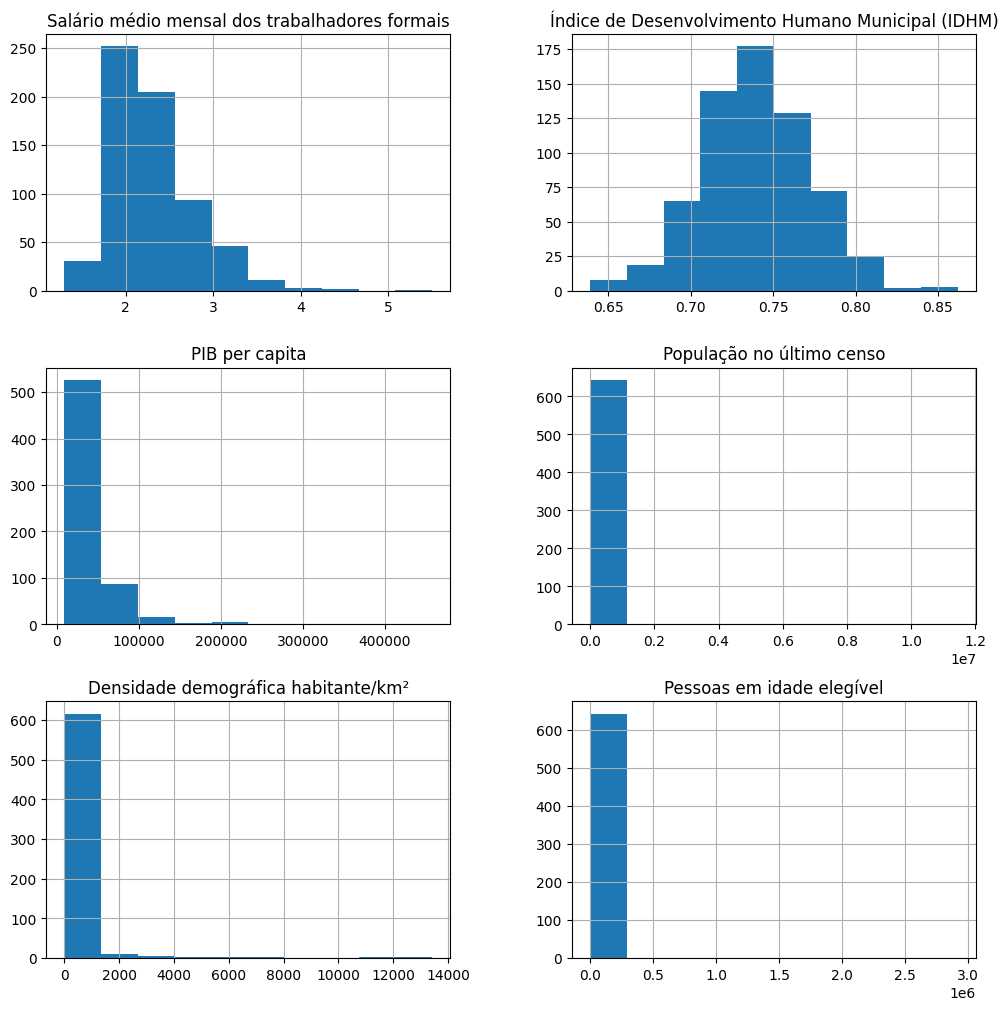

In [36]:
dados_model_kmeans.hist(figsize=(12,12))

c:\Users\tmdpaula\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tmdpaula\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tmdpaula\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tmdpaula\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: F

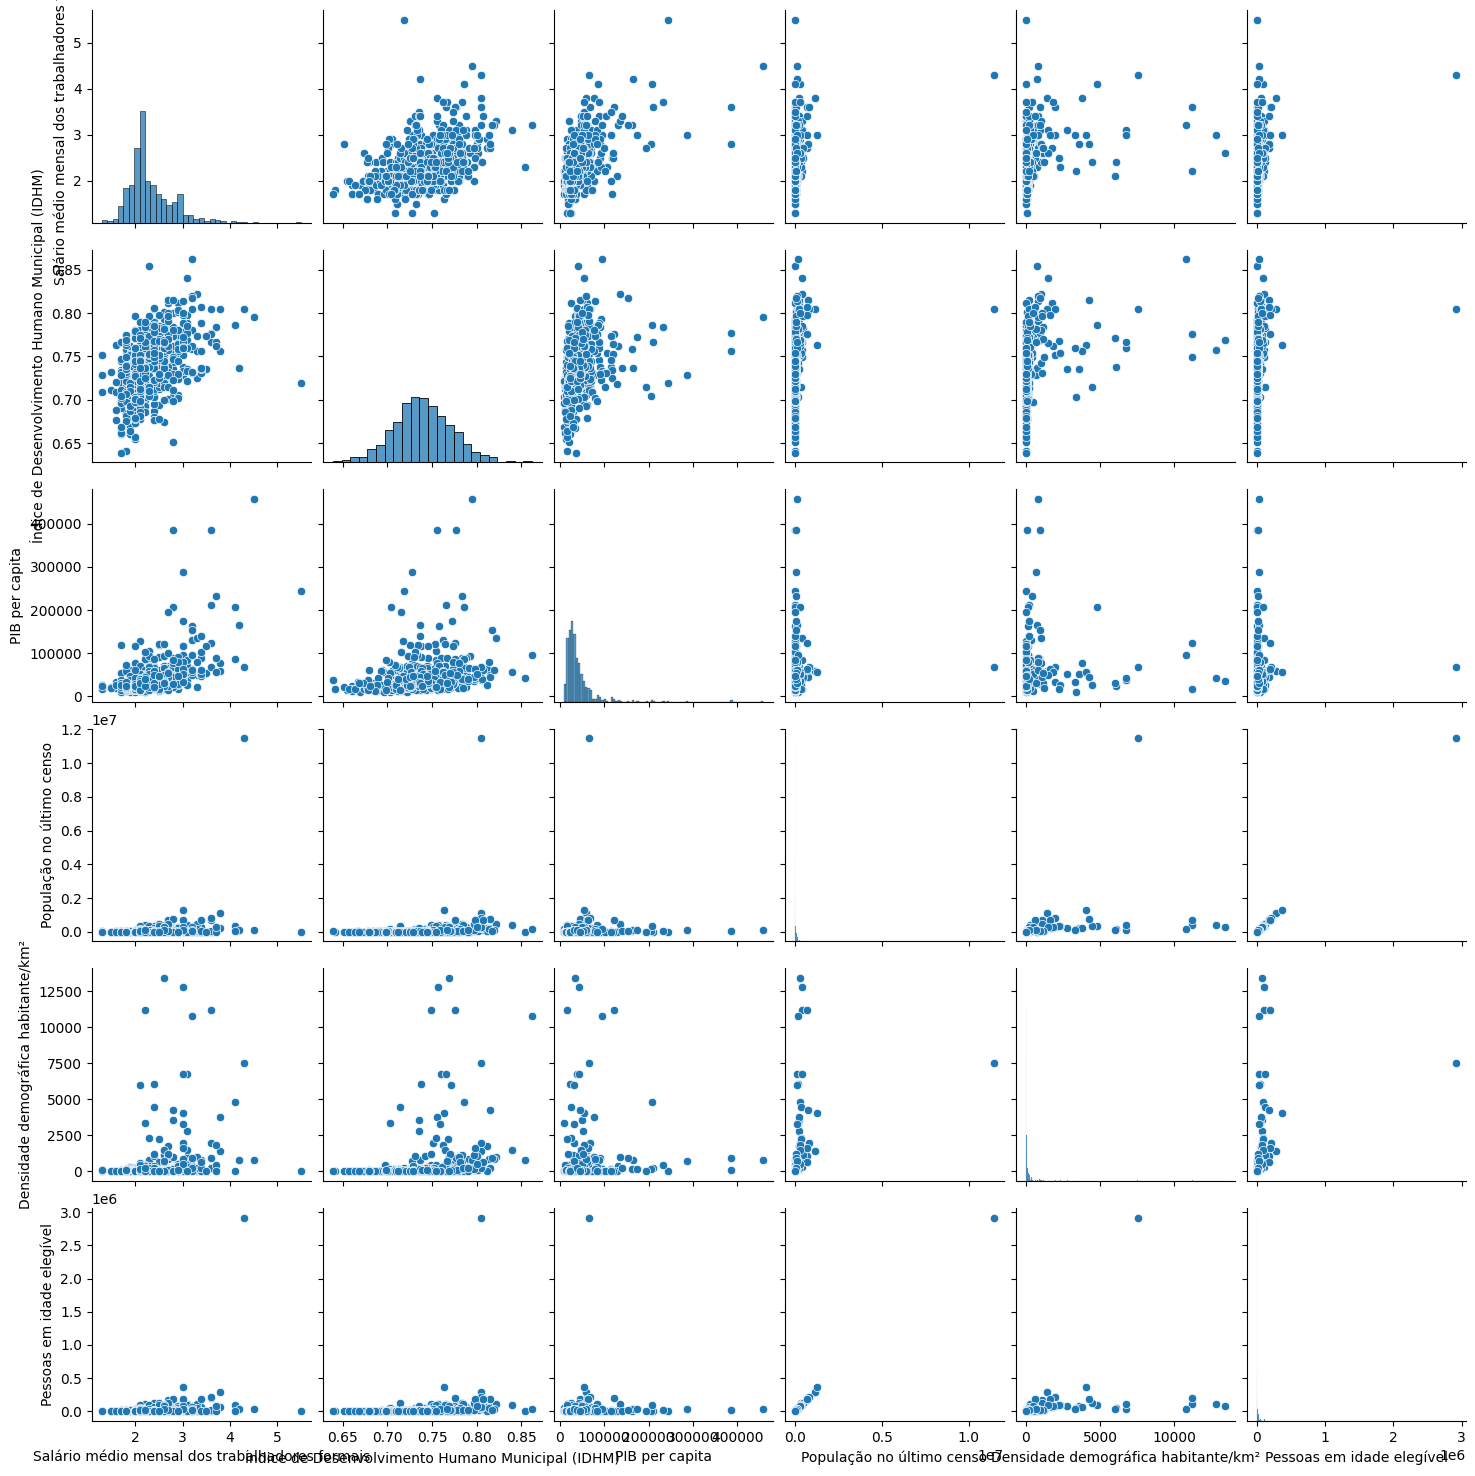

In [37]:
sns.pairplot(dados_model_kmeans)
plt.show()

In [38]:
model_kmeans = dados_model_kmeans.drop('Município', axis = 1)
model_kmeans.head()

,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível
0,2.2,0.790,38997.12,34687,84.19,7609
1,1.8,0.730,32578.28,4351,20.62,1064
2,2.3,0.715,35551.70,32072,67.58,8725
3,2.2,0.781,25297.02,7369,51.65,1580
4,1.9,0.745,30971.23,17930,298.21,4089


In [39]:
# Normalizandos os dados
variaveis_para_normalizar = ['População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']

variaveis_para_normalizar_inversamente = ['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita']

# Normalização
scaler = MinMaxScaler()
model_kmeans[variaveis_para_normalizar] = scaler.fit_transform(model_kmeans[variaveis_para_normalizar])

# Normalização inversa
scaler = MinMaxScaler()
model_kmeans[variaveis_para_normalizar_inversamente] = 1 - scaler.fit_transform(model_kmeans[variaveis_para_normalizar_inversamente])

model_kmeans.head()

,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível
0,0.785714,0.322870,0.934095,0.002950,0.006015,0.002532
1,0.880952,0.591928,0.948421,0.000301,0.001276,0.000290
2,0.761905,0.659193,0.941785,0.002722,0.004777,0.002915
3,0.785714,0.363229,0.964672,0.000564,0.003589,0.000467
4,0.857143,0.524664,0.952008,0.001487,0.021971,0.001326


In [40]:
# Pesos
prioridade_salario_medio = 6
prioridade_pib_per_capita = 5
prioridade_idh = 4
prioridade_densidade_demografica = 3
prioridade_populacao = 2
prioridade_pessoas_idade_elegivel = 1

# Atribuição de pesos
model_kmeans['Salário médio mensal dos trabalhadores formais'] = prioridade_salario_medio * model_kmeans['Salário médio mensal dos trabalhadores formais']
model_kmeans['PIB per capita'] = prioridade_pib_per_capita * model_kmeans['PIB per capita']
model_kmeans['Densidade demográfica habitante/km²'] = prioridade_densidade_demografica * model_kmeans['Densidade demográfica habitante/km²']
model_kmeans['População no último censo'] = prioridade_populacao * model_kmeans['População no último censo']
model_kmeans['Índice de Desenvolvimento Humano Municipal (IDHM)'] = prioridade_idh * model_kmeans['Índice de Desenvolvimento Humano Municipal (IDHM)']
model_kmeans['Pessoas em idade elegível'] = prioridade_pessoas_idade_elegivel * model_kmeans['Pessoas em idade elegível']

# Soma ponderada
model_kmeans['soma_ponderada'] = model_kmeans[['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']].sum(axis=1)

# Classificar o DataFrame com base na soma ponderada
dados_classificados_kmeans = model_kmeans.sort_values(by='soma_ponderada', ascending=False)

In [41]:
dados_classificados_kmeans.head()

,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,soma_ponderada
121,4.714286,2.026906,4.916960,0.067431,2.504636,0.038618,14.268836
61,5.285714,3.964126,4.921058,0.001043,0.000740,0.000599,14.173279
483,5.428571,4.000000,4.689905,0.003095,0.005189,0.001877,14.128637
261,5.428571,3.605381,4.968987,0.000594,0.001584,0.000395,14.005512
60,5.428571,3.623318,4.848077,0.000746,0.002071,0.000445,13.903229


In [42]:
dados_classificados_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 121 to 412
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Salário médio mensal dos trabalhadores formais     645 non-null    float64
 1   Índice de Desenvolvimento Humano Municipal (IDHM)  645 non-null    float64
 2   PIB per capita                                     645 non-null    float64
 3   População no último censo                          645 non-null    float64
 4   Densidade demográfica habitante/km²                645 non-null    float64
 5   Pessoas em idade elegível                          645 non-null    float64
 6   soma_ponderada                                     645 non-null    float64
dtypes: float64(7)
memory usage: 40.3 KB


In [43]:
#variaveis_preditoras = ['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']
variaveis_preditoras = ['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)']
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dados_classificados_kmeans['cluster'] = kmeans.fit_predict(dados_classificados_kmeans[variaveis_preditoras])

In [44]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

#Implementando o K-Means nos dados:
kmeans.fit(dados_classificados_kmeans[['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados_classificados_kmeans[['Salário médio mensal dos trabalhadores formais', 'Índice de Desenvolvimento Humano Municipal (IDHM)', 'PIB per capita', 'População no último censo', 'Densidade demográfica habitante/km²', 'Pessoas em idade elegível']])

In [45]:
dados_classificados_kmeans['Grupos'] = kmeans_labels
dados_classificados_kmeans.head()

,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,soma_ponderada,cluster,Grupos
121,4.714286,2.026906,4.916960,0.067431,2.504636,0.038618,14.268836,6,0
61,5.285714,3.964126,4.921058,0.001043,0.000740,0.000599,14.173279,3,5
483,5.428571,4.000000,4.689905,0.003095,0.005189,0.001877,14.128637,3,5
261,5.428571,3.605381,4.968987,0.000594,0.001584,0.000395,14.005512,3,5
60,5.428571,3.623318,4.848077,0.000746,0.002071,0.000445,13.903229,3,5


In [47]:
dados_classificados_kmeans.describe()

,Salário médio mensal dos trabalhadores formais,Índice de Desenvolvimento Humano Municipal (IDHM),PIB per capita,População no último censo,Densidade demográfica habitante/km²,Pessoas em idade elegível,soma_ponderada,cluster,Grupos
count,645.000000,645.000000,6.450000e+02,645.000000,645.000000,645.000000,645.000000,645.000000,645.00000
mean,4.550831,2.196823,4.630600e+00,0.011867,0.072963,0.006074,11.469158,4.106977,3.40000
std,0.683674,0.582553,4.441448e-01,0.081114,0.287319,0.040649,1.286581,2.284711,1.57267
min,0.000000,0.000000,-1.110223e-15,0.000000,0.000000,0.000000,2.837068,0.000000,0.00000
25%,4.285714,1.811659,4.583809e+00,0.000796,0.003735,0.000415,10.849576,3.000000,2.00000
50%,4.714286,2.224215,4.745953e+00,0.002141,0.008177,0.001078,11.661239,4.000000,4.00000
75%,5.000000,2.565022,4.838212e+00,0.006535,0.025495,0.003382,12.291300,6.000000,5.00000
max,6.000000,4.000000,5.000000e+00,2.000000,3.000000,1.000000,14.268836,7.000000,5.00000


In [54]:
# plotando os dados identificando com os seus clusters
# plotando os dados identificando com os seus clusters
# plt.scatter(
#     dados_classificados_kmeans[['Salário médio mensal dos trabalhadores formais']], 
#     dados_classificados_kmeans[['Índice de Desenvolvimento Humano Municipal (IDHM)']],
#     dados_classificados_kmeans[['PIB per capita']], 
#     dados_classificados_kmeans[['População no último censo']], 
#     dados_classificados_kmeans[['Densidade demográfica habitante/km²']], 
#     dados_classificados_kmeans[['Pessoas em idade elegível']],
#     c=kmeans_labels, alpha=0.5, cmap='rainbow')
#plt.xlabel('Salario Anual')
#plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], centroides[:, 3], centroides[:, 4], centroides[:, 5], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)

TypeError: scatter() got multiple values for argument 'c'